In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px
import fiona
from IPython.display import display

In [19]:
from sqlalchemy import create_engine

import tomli
with open("..\\..\\.streamlit\\secrets.toml",'rb') as f:
	config = tomli.load(f)

# client = supabase.create_client(config['supabase_url'],config['supabase_key'])

def connect_to_postgres(username,password,host,database):
	engine = create_engine(f"postgresql://{username}:{password}@{host}:5432/{database}")  
	return engine

def ag_water():
	engine = connect_to_postgres(	
		username='postgres',
		password=config['password'],
		host=config['host'],
		database='postgres',
	)
	return engine


7

In [2]:
file_path = r'\\ppeng.com\pzdata\gis\GIS_Library\Groundwater\Wells\CucamongaWells\CucamongaValleyWells.gdb'
gdfs = {
	layer:gpd.read_file(file_path,driver='FileGDB',layer=layer)
	for layer in fiona.listlayers(file_path)
}
gdfs.keys()

dict_keys(['HistoricWaterLevels', 'Wells', 'CucamongaValleySubbasin', 'Wells_Fall2020', 'Wells_Fall2021', 'CucamongaBasin_HydrologicBoundary', 'CucamongaBasin_AdjudicatedBoundary', 'CucamongaBasin_AdjudicatedBoundary_1958Decree', 'CucamongaBasin_HydrologicBoundary_2mileBuffer', 'CucamongaBasin_Hydrologic_Boundary', 'CucamongaBasin_AnalyticalBoundary', 'Wells_Fall2022'])

In [13]:
layers = [
	'HistoricWaterLevels',
	'Wells',
	'CucamongaValleySubbasin',
	'Wells_Fall2020',
	'Wells_Fall2021',
	'CucamongaBasin_HydrologicBoundary',
	'CucamongaBasin_AdjudicatedBoundary',
	'CucamongaBasin_AdjudicatedBoundary_1958Decree',
	'CucamongaBasin_HydrologicBoundary_2mileBuffer',
	'CucamongaBasin_Hydrologic_Boundary',
	'CucamongaBasin_AnalyticalBoundary',
	'Wells_Fall2022',
	]


,Basin_Number,Basin_Subbasin_Number,Basin_Name,Basin_Subbasin_Name,Region_Office,Date_Record_Last_Edited,Record_Edited_By,Comments,Date_Data_Applies_To,GlobalID,...,AC,Shape_Length,Shape_Area,Id,id,BUFF_DIST,ORIG_FID,Name,GIS_Acres,Shape_Leng
0,8-002,8-002.02,UPPER SANTA ANA VALLEY,UPPER SANTA ANA VALLEY - CUCAMONGA,SRO,2016-06-28 00:00:00+00:00,MZimmerman,Cucamonga Basin boundary was edited to conform...,NaT,{E4597B27-F045-43AC-9C92-76A7155D9352},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,...,37.999168,119199.390086,5.913211e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,...,NaN,87337.182381,3.809674e+08,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,...,NaN,93285.196073,3.605624e+08,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,...,NaN,182955.676478,2.156531e+09,0.0,NaN,10560.0,0.0,Analytical Boundary,49507.336873,NaN
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,...,NaN,119925.714869,5.638454e+08,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,...,37.999168,172122.075748,1.492220e+09,NaN,NaN,10560.0,1.0,NaN,NaN,119199.390086


HistoricWaterLevels


<Axes: >

,meas_by,dms_site_id,meas_date,meas_time,meas_depth,gse_wse,wse,rpe,GSE,vert_datum,meas_method,meas_accuracy,meas_questionable,static_pumping,meas_comments,NM_Code,QM_Code,ReadingAtWS_Correction,geometry
0,CVWD,CVWD 08,2000-10-31 00:00:00+00:00,NaT,347.0,347.0,1083.38,1430.375244,1430.375244,NAVD 88,NaN,NaN,NaN,Static,NaN,NaN,NaN,NaN,None
1,CVWD,CVWD 08,2000-11-20 00:00:00+00:00,NaT,339.0,339.0,1091.38,1430.375244,1430.375244,NAVD 88,NaN,NaN,NaN,Static,NaN,NaN,NaN,NaN,None
2,CVWD,CVWD 08,2000-12-26 00:00:00+00:00,NaT,336.0,336.0,1094.38,1430.375244,1430.375244,NAVD 88,NaN,NaN,NaN,Static,NaN,NaN,NaN,NaN,None


Index(['meas_by', 'dms_site_id', 'meas_date', 'meas_time', 'meas_depth',
       'gse_wse', 'wse', 'rpe', 'GSE', 'vert_datum', 'meas_method',
       'meas_accuracy', 'meas_questionable', 'static_pumping', 'meas_comments',
       'NM_Code', 'QM_Code', 'ReadingAtWS_Correction', 'geometry'],
      dtype='object')


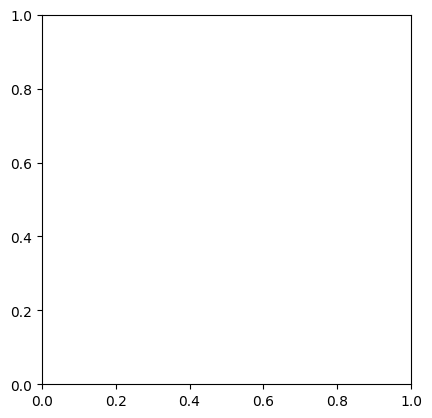

In [27]:
well_data = [
	'HistoricWaterLevels',
	# 'Wells',
	# 'Wells_Fall2020',
	# 'Wells_Fall2021',
	# 'Wells_Fall2022',

]
for layer in well_data:
	gdf = gdfs[layer]
	print(layer)
	display(gdf.plot())
	display(gdf.head(3))
	print(gdf.columns)

In [29]:
gdf = gdfs['HistoricWaterLevels']
gdf.to_wkt().to_sql('CB_well_water_levels',ag_water(),if_exists='replace')

473

In [25]:
gdf = gdfs['Wells'].to_crs('4326')
gdf.to_wkt().to_sql('CB_well_info',ag_water(),if_exists='replace')

58

In [18]:
boundaries = {
	'Subbasin Boundary':'CucamongaValleySubbasin',
	'Hydrologic Boundary':'CucamongaBasin_HydrologicBoundary',
	'Adjudicated Boundary':'CucamongaBasin_AdjudicatedBoundary',
	'Adjudicated Boundary - 1958 Decree':'CucamongaBasin_AdjudicatedBoundary_1958Decree',
	'Hydrologic Boundary - 2 mile buffer':'CucamongaBasin_HydrologicBoundary_2mileBuffer',
	'Hydrologic_Boundary':'CucamongaBasin_Hydrologic_Boundary',
	'Analytical Boundary':'CucamongaBasin_AnalyticalBoundary',
}

boundaries_for_join = []
for name,layer in boundaries.items():
	gdf = gdfs[layer].to_crs('4326')
	gdf['name'] = name
	
	boundaries_for_join.append(gdf[['name','geometry']])



# gdf = gdfs[layers[2]]

# combine boundaries
# boundaries_gdf = gpd.GeoDataFrame(pd.concat([gdfs[layer] for layer in boundaries]),crs="EPSG:4326")
# boundaries_gdf = gpd.GeoDataFrame(pd.concat([gdfs[layer] for layer in boundaries.values()]))
gdf = gpd.GeoDataFrame(pd.concat(boundaries_for_join))
# boundaries_gdf = boundaries_gdf.dissolve(by='OBJECTID')
gdf#.plot()

,name,geometry
0,Subbasin Boundary,"MULTIPOLYGON (((-117.55836 34.17091, -117.5583..."
0,Hydrologic Boundary,"MULTIPOLYGON (((-117.51099 34.17074, -117.5059..."
0,Adjudicated Boundary,"MULTIPOLYGON (((-117.55848 34.17121, -117.5888..."
0,Adjudicated Boundary - 1958 Decree,"MULTIPOLYGON (((-117.57397 34.17400, -117.5734..."
0,Hydrologic Boundary - 2 mile buffer,"MULTIPOLYGON (((-117.62080 34.07616, -117.6213..."
0,Hydrologic_Boundary,"MULTIPOLYGON (((-117.61660 34.10610, -117.6176..."
0,Analytical Boundary,"MULTIPOLYGON (((-117.45537 34.16897, -117.4553..."


In [ ]:
gdf.to_wkt().to_sql('CB_gis_boundaries',ag_water(),if_exists='replace')

In [ ]:

for layer in boundaries:V
	gdf = gdfs[layer]
	print(layer)
	display(gdf.plot())
	display(gdf.head(3))